In [1]:
#匯入lib
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load training data
data = pd.read_csv('regression1.csv')

In [3]:
data.head()

,X,y
0,235,591
1,216,539
2,148,413
3,35,310
4,85,308


In [4]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

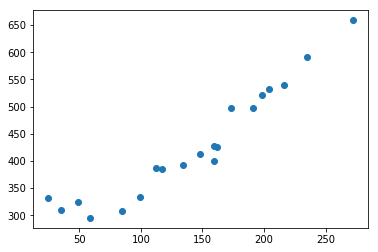

In [5]:
plt.plot(X, y, 'o')

In [6]:
mu = X.mean()
sigma = X.std()
Z = (X-mu)/sigma

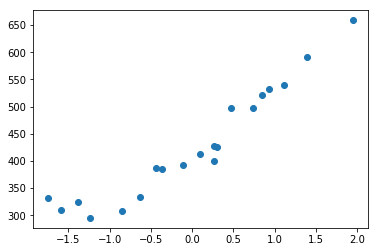

In [7]:
plt.plot(Z, y, 'o')

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()
X1 = Z.reshape(-1, 1)
lr.fit(X1, y)
y_pred = lr.predict(X1)
print('Slope: %.3f' % lr.coef_[0])
print('Intercept: %.3f' % lr.intercept_)

Slope: 95.564
Intercept: 428.600


#多項式回歸 theta[0] + theta[1]*x + theta[2]*x**2

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
pr = LinearRegression()
quadratic = PolynomialFeatures(degree = 2) #多一個x平方的項目
X_quad = quadratic.fit_transform(X1)

In [12]:
X_quad

array([[ 1.        ,  1.39433428,  1.94416809],
       [ 1.        ,  1.11069026,  1.23363286],
       [ 1.        ,  0.09554325,  0.00912851],
       [ 1.        , -1.59139223,  2.53252924],
       [ 1.        , -0.8449606 ,  0.71395842],
       [ 1.        ,  0.93154667,  0.8677792 ],
       [ 1.        , -1.38239138,  1.91100592],
       [ 1.        , -1.74067856,  3.02996185],
       [ 1.        ,  0.46875906,  0.21973506],
       [ 1.        ,  0.73747445,  0.54386856],
       [ 1.        , -0.11345761,  0.01287263],
       [ 1.        , -0.63595975,  0.4044448 ],
       [ 1.        , -0.36724436,  0.13486842],
       [ 1.        , -0.44188752,  0.19526458],
       [ 1.        ,  0.3045441 ,  0.09274711],
       [ 1.        ,  1.94669369,  3.78961632],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        , -1.23310505,  1.52054807],
       [ 1.        ,  0.84197488,  0.70892169]])

In [13]:
#fit linear features
pr.fit(X_quad, y)
y_quad_pred = pr.predict(X_quad)
print('theta1: %.3f' % pr.coef_[1]) #.3f是取三位
print('theta2: %.3f' % pr.coef_[2])
print('Intercept: %.3f' % pr.intercept_)

theta1: 97.133
theta2: 22.623
Intercept: 405.977


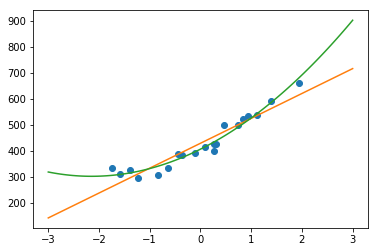

In [14]:
x = np.linspace(-3, 3, 100)

plt.plot(Z, y , 'o')
plt.plot(x, lr.intercept_+lr.coef_[0]*x)
plt.plot(x, pr.intercept_+pr.coef_[1]*x+pr.coef_[2]*x**2)

In [15]:
#computing MSE
from sklearn.metrics import mean_squared_error

print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_quad_pred))

MSE: 978.262
MSE: 377.582
